In [485]:
#import libraries needed
import pandas as pd
import geopandas as gpd
import numpy as np
from geoalchemy2 import Geometry, WKTElement
from sqlalchemy import *
import psycopg2
%matplotlib inline

pd.options.display.max_columns = None

#pd.options.display.max_columns = None
#display(df)
#parcels_final.head(999)


In [486]:
password = open('password.txt','r').readline()
username = 'kmerrem'

#conn = psycopg2.connect(host="localhost",database="gisdata", user="kmerrem", password=password)
#curs = conn.cursor()

#psycopg2 is used for postgres, can't use this conn to write with
# conn = psycopg2.connect(host="172.19.118.205",port="5432",database="gisdata", user="kmerrem", password=password)
# curs = conn.cursor()

#this is to write from geopandas to postgis table 
gisdata_engine = create_engine('postgresql://%s:%s@172.19.118.205:5432/gisdata' %(username,password))
walkability_engine = create_engine('postgresql://%s:%s@172.19.118.205:5432/walkability' %(username,password))

# con = psycopg2.connect(host="172.19.118.205",port="5432",database="walkability", user="kmerrem", password=password)
# curs = con.cursor()



In [487]:
parcels = gpd.read_postgis("select * from public.mun_parcel_mtm", gisdata_engine, 'geom')

In [488]:
address = gpd.read_postgis("select * from public.address_point", gisdata_engine, 'wkb_geometry')

In [489]:
address.dtypes

ogc_fid           int64
wkb_geometry     object
geo_id          float64
lfn_id          float64
link            float64
maint_stag       object
address          object
lfname           object
lonum           float64
lonumsuf         object
hinum           float64
hinumsuf         object
arc_side         object
distance        float64
fcode           float64
fcode_des        object
class            object
name             object
x               float64
y               float64
longitude       float64
latitude        float64
objectid        float64
mun_name         object
ward_name        object
dtype: object

In [490]:
#drop address columns

address.drop('lfn_id', 1, inplace=True)
address.drop('link', 1, inplace=True)
address.drop('maint_stag', 1, inplace=True)
address.drop('lonum', 1, inplace=True)
address.drop('lonumsuf', 1, inplace=True)
address.drop('hinum', 1, inplace=True)
address.drop('hinumsuf', 1, inplace=True)
address.drop('arc_side', 1, inplace=True)
address.drop('distance', 1, inplace=True)
address.drop('fcode', 1, inplace=True)
address.drop('fcode_des', 1, inplace=True)
address.drop('class', 1, inplace=True)
address.drop('name', 1, inplace=True)
address.drop('x', 1, inplace=True)
address.drop('y', 1, inplace=True)
address.drop('longitude', 1, inplace=True)
address.drop('latitude', 1, inplace=True)
address.drop('mun_name', 1, inplace=True)
address.drop('ward_name', 1, inplace=True)

In [491]:
buildings = gpd.read_postgis("select * from public.topo_building", walkability_engine, 'geom')

In [492]:
#drop topo building columns I don't need
buildings.drop('subtype_co', 1, inplace=True)
buildings.drop('subtype_de', 1, inplace=True)
buildings.drop('derived_he', 1, inplace=True)
buildings.drop('derived_ow', 1, inplace=True)
buildings.drop('last_geome', 1, inplace=True)
buildings.drop('elevation', 1, inplace=True)
buildings.drop('last_attri', 1, inplace=True)
buildings.drop('x', 1, inplace=True)
buildings.drop('y', 1, inplace=True)
buildings.drop('longitude', 1, inplace=True)
buildings.drop('latitude', 1, inplace=True)
buildings.drop('shape_area', 1, inplace=True)
buildings.drop('shape_len', 1, inplace=True)

In [493]:
#contains Zivorad's assesment extraction of city owned and hydro assessment roll numbers and PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI
#assm_data = pd.read_csv("./city_hydro1.csv")

#NEED TO EXCLUDE PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI CODES FROM PARCEL_FINAL FROM CITY OF TORONTO LAND
#TO BUILD ON

assm_data = pd.read_csv("./city_hydro_lands.csv")

In [494]:
assm_data.dtypes

AROLL          int64
name_1        object
use            int64
use_desc      object
zoning        object
frontage     float64
depth        float64
site_area    float64
dtype: object

In [495]:
#adding lowercase aroll with int64 datatype
assm_data['aroll'] =assm_data.AROLL.astype(np.int64)



In [496]:
assm_data.dtypes

AROLL          int64
name_1        object
use            int64
use_desc      object
zoning        object
frontage     float64
depth        float64
site_area    float64
aroll          int64
dtype: object

In [497]:
parcels.dtypes

gid             int64
parcelid      float64
name           object
feature_ty     object
statedarea     object
aroll          object
aroll_sour     object
shape_area    float64
shape_len     float64
geom           object
dtype: object

In [498]:
parcels

,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom
0,1,5126707.0,102960109,COMMON,18544.7199707 sq.m,1908013300006000000,Initial load,18544.698948,0.0,"(POLYGON ((301943.28 4846265.31, 301944.1 4846..."
1,2,5126712.0,073070235,COMMON,524.1062012 sq.m,1919043243091000000,Initial load,524.055182,0.0,"(POLYGON ((297436.54 4846319.175, 297429.615 4..."
2,3,5126717.0,103030269,COMMON,639.3393555 sq.m,1908013860018000000,Initial load,639.340665,0.0,"(POLYGON ((298567.808 4846354.658, 298580.591 ..."
3,4,5126718.0,073070232,COMMON,289.170166 sq.m,1919043243094000000,Initial load,289.141536,0.0,"(POLYGON ((297399.593 4846320.618, 297399.647 ..."
4,5,5126719.0,073070228,COMMON,354.3927002 sq.m,1919043243098000000,Initial load,354.367891,0.0,"(POLYGON ((297371.968 4846354.228, 297373.766 ..."
5,6,5126731.0,073070231,COMMON,288.8579102 sq.m,1919043243095000000,Initial load,288.837716,0.0,"(POLYGON ((297399.894 4846354.22, 297399.781 4..."
6,7,5126733.0,073070229,COMMON,313.255127 sq.m,1919043243097000000,Initial load,313.221492,0.0,"(POLYGON ((297382.392 4846320.41, 297373.26 48..."
7,8,5126741.0,073070230,COMMON,288.7409668 sq.m,1919043243096000000,Initial load,288.707888,0.0,"(POLYGON ((297382.693 4846353.977, 297391.293 ..."
8,9,5126386.0,103030245,COMMON,426.3751221 sq.m,1908013860002000000,Initial load,426.374161,0.0,"(POLYGON ((298518.724 4846368.408, 298531.524 ..."
9,10,5124156.0,103070591,COMMON,293.4599609 sq.m,1908013710017000000,Initial load,293.455446,0.0,"(POLYGON ((299064.547 4846465.303, 299077.615 ..."


In [499]:
#adding column shape_area_1 column and updating column with values from
#shape_area column becuase ArcPro can't see shape_area column and it has
#the polygon area

parcels['shape_area_1'] = parcels.shape_area.astype(np.float64)
parcels.shape_area_1 = parcels.shape_area.astype(np.float64)

In [500]:
#drop rows containing nan values only from aroll column
parcels = parcels.dropna(subset=['aroll'],how='any',axis=0)

# changing aroll data type from object to int64
parcels.aroll = parcels.aroll.astype(np.int64)

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [501]:
parcels.dtypes

gid               int64
parcelid        float64
name             object
feature_ty       object
statedarea       object
aroll             int64
aroll_sour       object
shape_area      float64
shape_len       float64
geom             object
shape_area_1    float64
dtype: object

In [502]:
parcels

,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,shape_area_1
0,1,5126707.0,102960109,COMMON,18544.7199707 sq.m,1908013300006000000,Initial load,18544.698948,0.0,"(POLYGON ((301943.28 4846265.31, 301944.1 4846...",18544.698948
1,2,5126712.0,073070235,COMMON,524.1062012 sq.m,1919043243091000000,Initial load,524.055182,0.0,"(POLYGON ((297436.54 4846319.175, 297429.615 4...",524.055182
2,3,5126717.0,103030269,COMMON,639.3393555 sq.m,1908013860018000000,Initial load,639.340665,0.0,"(POLYGON ((298567.808 4846354.658, 298580.591 ...",639.340665
3,4,5126718.0,073070232,COMMON,289.170166 sq.m,1919043243094000000,Initial load,289.141536,0.0,"(POLYGON ((297399.593 4846320.618, 297399.647 ...",289.141536
4,5,5126719.0,073070228,COMMON,354.3927002 sq.m,1919043243098000000,Initial load,354.367891,0.0,"(POLYGON ((297371.968 4846354.228, 297373.766 ...",354.367891
5,6,5126731.0,073070231,COMMON,288.8579102 sq.m,1919043243095000000,Initial load,288.837716,0.0,"(POLYGON ((297399.894 4846354.22, 297399.781 4...",288.837716
6,7,5126733.0,073070229,COMMON,313.255127 sq.m,1919043243097000000,Initial load,313.221492,0.0,"(POLYGON ((297382.392 4846320.41, 297373.26 48...",313.221492
7,8,5126741.0,073070230,COMMON,288.7409668 sq.m,1919043243096000000,Initial load,288.707888,0.0,"(POLYGON ((297382.693 4846353.977, 297391.293 ...",288.707888
8,9,5126386.0,103030245,COMMON,426.3751221 sq.m,1908013860002000000,Initial load,426.374161,0.0,"(POLYGON ((298518.724 4846368.408, 298531.524 ...",426.374161
9,10,5124156.0,103070591,COMMON,293.4599609 sq.m,1908013710017000000,Initial load,293.455446,0.0,"(POLYGON ((299064.547 4846465.303, 299077.615 ...",293.455446


In [503]:
# merging parcels and assm_data on aroll to only include city owned and hydro parcels
parcels_final = parcels.merge(assm_data,on='aroll')


In [504]:
parcels_final.dtypes

gid               int64
parcelid        float64
name             object
feature_ty       object
statedarea       object
aroll             int64
aroll_sour       object
shape_area      float64
shape_len       float64
geom             object
shape_area_1    float64
AROLL             int64
name_1           object
use               int64
use_desc         object
zoning           object
frontage        float64
depth           float64
site_area       float64
dtype: object

In [505]:
parcels_final

,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,shape_area_1,AROLL,name_1,use,use_desc,zoning,frontage,depth,site_area
0,133,5117108.0,103020081,COMMON,668.5805664 sq.m,1908013722059000000,Initial load,668.608912,0.0,"(POLYGON ((299052.866 4846780.589, 299089.02 4...",668.608912,1908013722059000000,TORONTO CITY,103,Municipal Park,RM2,60.00,120.00,0.17
1,142,5121853.0,102830642,COMMON,1538.6303711 sq.m,1908013260001000000,Initial load,1538.593959,0.0,"(POLYGON ((303207.563 4846527.294, 303207.41 4...",1538.593959,1908013260001000000,TORONTO HYDRO-ELECTRIC SYSTEM LIMITED,560,MEU Transformer Stn,O3,75.00,222.75,0.38
2,265,5125483.0,073070407,COMMON,2.5244141 sq.m,1919043367002000000,Initial load,2.523537,0.0,"(POLYGON ((297464.82 4846408.147, 297456.967 4...",2.523537,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03
3,354,5124697.0,073150023,COMMON,2.6481934 sq.m,1919043367002000000,Initial load,2.646964,0.0,"(POLYGON ((297518.32 4846434.418, 297518.337 4...",2.646964,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03
4,360,5125003.0,073070407,RESERVE,84.7713623 sq.m,1919043367002000000,Initial load,84.726690,0.0,"(POLYGON ((297206.563 4846426.32, 297326.725 4...",84.726690,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03
5,601,5125194.0,073070407,RESERVE,1.30896 sq.m,1919043367002000000,Initial load,1.309677,0.0,"(POLYGON ((297509.148 4846421.354, 297507.949 ...",1.309677,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03
6,638,5122922.0,073150025,COMMON,12.7009277 sq.m,1919043367002000000,Initial load,12.704280,0.0,"(POLYGON ((297489.242 4846523.609, 297489.532 ...",12.704280,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03
7,777,5125527.0,073070407,RESERVE,2.90271 sq.m,1919043367002000000,Initial load,2.901366,0.0,"(POLYGON ((297456.967 4846406.3, 297448.022 48...",2.901366,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03
8,824,5125288.0,073070407,COMMON,1.0571289 sq.m,1919043367002000000,Initial load,1.057698,0.0,"(POLYGON ((297497.291 4846417.63, 297493.973 4...",1.057698,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03
9,2632,5124902.0,073070407,COMMON,4.9552002 sq.m,1919043367002000000,Initial load,4.961505,0.0,"(POLYGON ((297515.729 4846427.044, 297516.736 ...",4.961505,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03


In [506]:
#Create HYDRO dataframe based ownership HYDRO ONE NETWORKS INC and aroll = 1901127950083000000
#which is owned by PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI
#don't want the rest of the PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI aroll numbers
#beause they don't reflect hydro corridors.

parcels_final['hydro'] = (parcels_final['name_1']=='HYDRO ONE NETWORKS INC') | (parcels_final['AROLL']==1901127950083000000)


In [507]:
parcels_final.dtypes

gid               int64
parcelid        float64
name             object
feature_ty       object
statedarea       object
aroll             int64
aroll_sour       object
shape_area      float64
shape_len       float64
geom             object
shape_area_1    float64
AROLL             int64
name_1           object
use               int64
use_desc         object
zoning           object
frontage        float64
depth           float64
site_area       float64
hydro              bool
dtype: object

In [508]:
parcels_final.hydro.value_counts()

False    8594
True      456
Name: hydro, dtype: int64

In [251]:
#Displaying use descriptions for scenarios. Originally PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI
#was not included.
#We now have unwanted use descriptions because the introduction of
#PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI as an owner

parcels_final.use_desc.value_counts()


Municipal Park                              2332
Non-buildable land (walkway,buffer,etc)     1794
Vacant Residential                           756
Single Family Attached                       381
Servco Hydro Right-of-Way                    354
Single Family Detached                       275
Multi-Res (More than 6 units)                255
Parking Lot                                  192
MEU Transformer Stn                          184
Vacant Industrial Land                       166
Land designated and zoned for open space     154
Non-commercial sports complex                138
Freehold Townhouse/Rowhouse                  135
Public Transportation Facility               130
Row Housing 7 or more units (1 Title)        120
Vacant Commercial land                       120
Multi-residential (7 or more units)           95
Fire Hall                                     93
Res with 2 Self-contained Units               92
Subway station                                87
Library and Literary

In [252]:
parcels_final.use_desc.unique()


array(['Municipal Park', 'MEU Transformer Stn',
       'Non-buildable land (walkway,buffer,etc)', 'Amusement Park',
       'Library and Literary Inst', 'Servco Hydro Right-of-Way',
       'Servco Transformer Stn', 'Non-commercial sports complex',
       'Fire Hall', 'School (Elememtary or Secondary)',
       'Multi-residential (7 or more units)',
       'Row Housing 7 or more units (1 Title)', 'Police Station',
       'Vacant Residential', 'Other Industrial', 'Transit garage',
       'Multi-Res (More than 6 units)', 'Vacant Industrial Land',
       'Vacant Commercial land', 'Church', 'Single Family Attached',
       'Single Family Detached', 'Ambulance Base',
       'Res with 2 Self-contained Units', 'Day Care/Nursery',
       'Res with Com/Ind Use', 'Golf Course',
       'Cement/Asphalt Manufacturing Plant', 'Recreational Sports Club',
       'Large office building, multi-tennated',
       'Provincial correctional facility',
       'Transfer station/incineration/landfill', 'Surface pa

In [188]:
#tried to exclude hydro ownership that would include
#the one assessment roll number = 1901127950083000000 by using the hydro setting == False
#but not sure why Matthew sets the value != False
#city_parcel = parcels_final[parcels_final.hydro != False]

#city_parcel = parcels_final[parcels_final.hydro == False]
#city_parcel.USE_DESC.value_counts()

Municipal Park                              2332
Non-buildable land (walkway,buffer,etc)     1794
Vacant Residential                           756
Single Family Attached                       381
Single Family Detached                       270
Multi-Res (More than 6 units)                255
Parking Lot                                  188
MEU Transformer Stn                          184
Vacant Industrial Land                       162
Land designated and zoned for open space     154
Non-commercial sports complex                138
Freehold Townhouse/Rowhouse                  135
Public Transportation Facility               130
Row Housing 7 or more units (1 Title)        120
Vacant Commercial land                       116
Multi-residential (7 or more units)           95
Fire Hall                                     93
Res with 2 Self-contained Units               91
Subway station                                87
Library and Literary Inst                     83
Other Industrial    

In [189]:
#city_parcel.USE_DESC.unique()

array(['Municipal Park', 'MEU Transformer Stn',
       'Non-buildable land (walkway,buffer,etc)',
       'Library and Literary Inst', 'Non-commercial sports complex',
       'Fire Hall', 'School (Elememtary or Secondary)',
       'Multi-residential (7 or more units)',
       'Row Housing 7 or more units (1 Title)', 'Police Station',
       'Vacant Residential', 'Transit garage',
       'Multi-Res (More than 6 units)', 'Vacant Industrial Land',
       'Vacant Commercial land', 'Other Industrial', 'Church',
       'Single Family Attached', 'Single Family Detached',
       'Ambulance Base', 'Res with 2 Self-contained Units',
       'Day Care/Nursery', 'Res with Com/Ind Use', 'Golf Course',
       'Cement/Asphalt Manufacturing Plant', 'Recreational Sports Club',
       'Large office building, multi-tennated',
       'Provincial correctional facility',
       'Transfer station/incineration/landfill', 'Surface parking lot',
       'Warehousing', 'Sewage/Water Treatment',
       'Freehold Tow

In [509]:
#VALUES BASED ON ORIGINAL NAME = HYDRO ONE NETWORKS INC AND CITY OF TORONTO LAND IDENTIFIED BY ZIVORAD'S INITIAL 
#EXTRACTION QUERY

# make column names lower case because ARCGIS Pro can't handle uppercase or mixed case


#parcel_final and add columns to indicate potential parcels to build on
parcels_final['cat_one'] =0
#parcels_final['cat_two'] =0
#parcels_final['cat_three'] =0

#parcels to build solar arrays
cat_one = ['Servco Hydro Right-of-Way','Parking Lot','Vacant Industrial Land','Land designated and zoned for open space',
        'Non-commercial sports complex','Vacant Commercial land', 'Fire Hall','Other Industrial', 'Sewage/Water Treatment',
        'Standard Industrial Prop','Transit garage','Sewage treatment/pumping waste disposal','Heavy Industrial Prop',
        'Vacant Residential','Transfer station/incineration/landfill',  'Mini-warehousing', 
       'Vacant Res/Rec Land on Water','Exhibition/Fair Grounds','Multi-residential Vacant Land',
       'Residential development land','Marina - Com, Storage, Service']

#parcels we can't build on
# I included 
cat_two = ['MEU Transformer Stn','Non-buildable land (walkway,buffer,etc)','Servco Transformer Stn','Single Family Attached',
        'Single Family Detached','Res with 2 Self-contained Units','Cement/Asphalt Manufacturing Plant','Surface parking lot'
        ,'Water Lot entirely under Water','Land of a Conservation Authority',
       'Land designated and zoned for open space','Private Transformer Stn','Communication towers',\
       'Federal airport','Government - historic site or monument','Cemetery','Railway right-of-way',]

#I assuming we can build on roofs of buildings
#parcels perhaps we can build in
cat_three = ['Municipal Park','Amusement Park','Library and Literary Inst',
        'School (Elememtary or Secondary)','Multi-residential (7 or more units)','Row Housing 7 or more units (1 Title)',
        'Police Station','Multi-Res (More than 6 units)','Church','Ambulance Base',
       'Day Care/Nursery','Res with Com/Ind Use','Golf Course','Recreational Sports Club','Warehousing',
       'Freehold Townhouse/Rowhouse', 'Development utilizing existing struct', 'Sport Complexes','Clubs, Private and Fraternal',
        'Nursing Homes, all Types','Large office building, multi-tennated', 'Museum and Art Gallery',
       'Restaurant - Fast Food', 'Other Educational Inst','Public Transportation Facility', 'Assembly Hall, Cummunity Hall',
       'Subway station','Retail with office(s) < 10000 sq ft','Prop with Communication Structure',
        'Parking Garage','Res with 4 Self-contained units','Other Institutional Residences','Retail',
        'Cooperative Housing,Non-Equity','Row Housing 3 to 6 units (1 Title)',
       'Retail with Residential Unit(s)', 'Residential Condominium',
       'Res with 5 Self-contained units', 'Rooming or Boarding House','Res with 6 Self-contained units',
       'Res with 3 Self-contained units', 'Full service hotel',
       'Restaurant - Conventional', 'Office Use Converted from House','Railway buildings',
       'Speciality Automotive Shop', 'Commercial Condominium',
       'Concert hall/live theatre', 'Office Building', 'Armoury','Convention, conference, congress centre',
       'Neighborhood shopping centre (2 stores)','Professional sports complex', 'Motel (other than seasonal)',
       'Limited service hotel','Auto Dealership','Public transportation - other',
       'Neighbourhood Shopping Area', 'Bachelorette','Multi-Type Complex', 'More than 1 Structure',
       'Neighborhood shopping centre', 'Industrial Mall (Rental Only)', 'Auto dealership',
       'Res Condo Conv rented more than 6 units',
       'Other Health Care Facility', 'Old Age/Retirement Home',
       'Retail with Office(s)', 'Banks and Similar Financial Inst',
       'Hospitals, Private and Public',
       'Bed+Breakfast Estab (predominant use)']

In [510]:
if parcels_final.use_desc.isin(cat_one).any():
    parcels_final.loc[parcels_final.use_desc.isin(cat_one),'cat_one'] = 1

In [511]:
#Pandas isin() method is used to filter data frames. isin() method helps in selecting rows
#with having a particular(or Multiple) value in a particular column. 
#Filtering
#.loc is only true
parcels_final.loc[parcels_final.use_desc.isin(cat_one),'cat_one'] = 1

parcels_final.loc[parcels_final.use_desc.isin(cat_two),'cat_one'] = 2

parcels_final.loc[parcels_final.use_desc.isin(cat_three),'cat_one'] = 3

# if parcels_final.use_desc.isin(cat_one).any():
#     parcels_final.loc[parcels_final.use_desc.isin(cat_one),'cat_one'] = 1
# elif parcels_final.use_desc.isin(cat_two):
#     parcels_final['cat_one'] = 2
# elif parcels_final.use_desc.isin(cat_three):
#     parcels_final['cat_one'] = 3
# else:
#     parcels_final['cat_one'] = None
# parcels_final['cat_one'] =
# parcels_final['cat_one']
# parcels_final['cat_two'] =parcels_final.use_desc.isin(cat_two)
# parcels_final['cat_two']
# parcels_final['cat_three'] =parcels_final.use_desc.isin(cat_three)
# parcels_final['cat_three']

In [459]:
parcels_final.cat_one

0       3
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      3
13      3
14      3
15      2
16      2
17      2
18      2
19      2
20      3
21      3
22      2
23      3
24      3
25      3
26      3
27      2
28      2
29      2
       ..
9020    1
9021    3
9022    2
9023    1
9024    2
9025    1
9026    3
9027    1
9028    2
9029    2
9030    2
9031    2
9032    2
9033    3
9034    1
9035    1
9036    1
9037    1
9038    3
9039    3
9040    1
9041    1
9042    1
9043    1
9044    3
9045    1
9046    1
9047    1
9048    2
9049    1
Name: cat_one, Length: 9050, dtype: int64

In [460]:
parcels_final

,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,AROLL,name_1,use,use_desc,zoning,frontage,depth,site_area,hydro,cat_one
0,133,5117108.0,103020081,COMMON,668.5805664 sq.m,1908013722059000000,Initial load,668.608912,0.0,"(POLYGON ((299052.866 4846780.589, 299089.02 4...",1908013722059000000,TORONTO CITY,103,Municipal Park,RM2,60.00,120.00,0.17,False,3
1,142,5121853.0,102830642,COMMON,1538.6303711 sq.m,1908013260001000000,Initial load,1538.593959,0.0,"(POLYGON ((303207.563 4846527.294, 303207.41 4...",1908013260001000000,TORONTO HYDRO-ELECTRIC SYSTEM LIMITED,560,MEU Transformer Stn,O3,75.00,222.75,0.38,False,2
2,265,5125483.0,073070407,COMMON,2.5244141 sq.m,1919043367002000000,Initial load,2.523537,0.0,"(POLYGON ((297464.82 4846408.147, 297456.967 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2
3,354,5124697.0,073150023,COMMON,2.6481934 sq.m,1919043367002000000,Initial load,2.646964,0.0,"(POLYGON ((297518.32 4846434.418, 297518.337 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2
4,360,5125003.0,073070407,RESERVE,84.7713623 sq.m,1919043367002000000,Initial load,84.726690,0.0,"(POLYGON ((297206.563 4846426.32, 297326.725 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2
5,601,5125194.0,073070407,RESERVE,1.30896 sq.m,1919043367002000000,Initial load,1.309677,0.0,"(POLYGON ((297509.148 4846421.354, 297507.949 ...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2
6,638,5122922.0,073150025,COMMON,12.7009277 sq.m,1919043367002000000,Initial load,12.704280,0.0,"(POLYGON ((297489.242 4846523.609, 297489.532 ...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2
7,777,5125527.0,073070407,RESERVE,2.90271 sq.m,1919043367002000000,Initial load,2.901366,0.0,"(POLYGON ((297456.967 4846406.3, 297448.022 48...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2
8,824,5125288.0,073070407,COMMON,1.0571289 sq.m,1919043367002000000,Initial load,1.057698,0.0,"(POLYGON ((297497.291 4846417.63, 297493.973 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2
9,2632,5124902.0,073070407,COMMON,4.9552002 sq.m,1919043367002000000,Initial load,4.961505,0.0,"(POLYGON ((297515.729 4846427.044, 297516.736 ...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2


In [512]:
#Isolating hydro parcles to visualize
hydro_parcel = parcels_final[parcels_final.hydro == True]

In [462]:
hydro_parcel

,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,AROLL,name_1,use,use_desc,zoning,frontage,depth,site_area,hydro,cat_one
23,632,5122938.0,102830643,COMMON,1945.5362549 sq.m,1908013990002000000,Initial load,1945.450453,0.0,"(POLYGON ((303147.32 4846435.503, 303148.554 4...",1908013990002000000,HYDRO ONE NETWORKS INC,725,Amusement Park,O3,354.52,0.00,2.83,True,3
24,739,5124752.0,102830646,COMMON,1057.9720459 sq.m,1908013990002000000,Initial load,1057.926493,0.0,"(POLYGON ((303121.213 4846390.888, 303081.835 ...",1908013990002000000,HYDRO ONE NETWORKS INC,725,Amusement Park,O3,354.52,0.00,2.83,True,3
25,1530,5122328.0,102830644,COMMON,16934.9040527 sq.m,1908013990002000000,Initial load,16934.398798,0.0,"(POLYGON ((303290.441 4846440.927, 303290.147 ...",1908013990002000000,HYDRO ONE NETWORKS INC,725,Amusement Park,O3,354.52,0.00,2.83,True,3
26,5122,5127522.0,102960148,COMMON,19081.1898193 sq.m,1908013990002000000,Initial load,19080.729943,0.0,"(POLYGON ((302459.58 4846237.862, 302460.568 4...",1908013990002000000,HYDRO ONE NETWORKS INC,725,Amusement Park,O3,354.52,0.00,2.83,True,3
40,2186,5123010.0,102830645,COMMON,77999.9597168 sq.m,1908012990001000000,Initial load,77998.269449,0.0,"(POLYGON ((303108.404 4846498.374, 303108.346 ...",1908012990001000000,HYDRO ONE NETWORKS INC,561,Servco Hydro Right-of-Way,NaN,0.00,0.00,525.75,True,1
41,6071,5146028.0,102950003,COMMON,45903.6893311 sq.m,1908012990001000000,Initial load,45903.957790,0.0,"(POLYGON ((301671.01 4845446.471, 301685.463 4...",1908012990001000000,HYDRO ONE NETWORKS INC,561,Servco Hydro Right-of-Way,NaN,0.00,0.00,525.75,True,1
42,7884,5156483.0,103101061,COMMON,720.9689941 sq.m,1908012990001000000,Initial load,720.974716,0.0,"(POLYGON ((301430.933 4845017.081, 301426.154 ...",1908012990001000000,HYDRO ONE NETWORKS INC,561,Servco Hydro Right-of-Way,NaN,0.00,0.00,525.75,True,1
43,7924,5143108.0,102930001,COMMON,17786.019165 sq.m,1908012990001000000,Initial load,17786.783444,0.0,"(POLYGON ((301613.798 4845582.85, 301608.893 4...",1908012990001000000,HYDRO ONE NETWORKS INC,561,Servco Hydro Right-of-Way,NaN,0.00,0.00,525.75,True,1
44,89104,5095534.0,101790109,COMMON,36073.5880127 sq.m,1908012990001000000,Initial load,36073.266108,0.0,"(POLYGON ((307372.474 4847750.722, 307373.01 4...",1908012990001000000,HYDRO ONE NETWORKS INC,561,Servco Hydro Right-of-Way,NaN,0.00,0.00,525.75,True,1
45,90233,5113185.0,102450057,COMMON,85651.4233398 sq.m,1908012990001000000,Initial load,85652.511601,0.0,"(POLYGON ((304667.551 4846964.55, 304668.888 4...",1908012990001000000,HYDRO ONE NETWORKS INC,561,Servco Hydro Right-of-Way,NaN,0.00,0.00,525.75,True,1


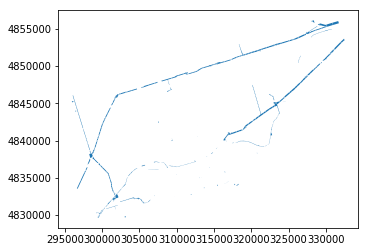

In [513]:
hydro_parcel.plot()

# MISSING HYDRO NEWTORKS
#ax = CAT1.plot(figsize=(16,16))
#hydro_parcel.plot(ax=ax, color='red')

In [514]:
#Isolating city of toronto parcels

#parcels_final['city'] = (parcels_final['NAME']!='HYDRO ONE NETWORKS INC')

#parcels_final['city'] = (parcels_final['NAME']!= 'PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI')

#parcels_final['city'] = (parcels_final['NAME']!='HYDRO ONE NETWORKS INC') | (parcels_final['NAME']!= 'PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI')

parcels_final['city'] = (parcels_final['name_1']!='HYDRO ONE NETWORKS INC') & (parcels_final['name_1']!= 'PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI')

#Would need not is in
#parcels_final['city'] =parcels_final.NAME.isin(['HYDRO ONE NETWORKS INC','PROVINCE OF ONTARIO MINISTER OF INFRASTRUCTURE MEDEI'])

In [515]:
parcels_final.dtypes

gid               int64
parcelid        float64
name             object
feature_ty       object
statedarea       object
aroll             int64
aroll_sour       object
shape_area      float64
shape_len       float64
geom             object
shape_area_1    float64
AROLL             int64
name_1           object
use               int64
use_desc         object
zoning           object
frontage        float64
depth           float64
site_area       float64
hydro              bool
cat_one           int64
city               bool
dtype: object

In [516]:
#Isolating city parcels to visualize
city_parcel = parcels_final[parcels_final.city == True]

In [517]:
city_parcel

,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,shape_area_1,AROLL,name_1,use,use_desc,zoning,frontage,depth,site_area,hydro,cat_one,city
0,133,5117108.0,103020081,COMMON,668.5805664 sq.m,1908013722059000000,Initial load,668.608912,0.0,"(POLYGON ((299052.866 4846780.589, 299089.02 4...",668.608912,1908013722059000000,TORONTO CITY,103,Municipal Park,RM2,60.00,120.00,0.17,False,3,True
1,142,5121853.0,102830642,COMMON,1538.6303711 sq.m,1908013260001000000,Initial load,1538.593959,0.0,"(POLYGON ((303207.563 4846527.294, 303207.41 4...",1538.593959,1908013260001000000,TORONTO HYDRO-ELECTRIC SYSTEM LIMITED,560,MEU Transformer Stn,O3,75.00,222.75,0.38,False,2,True
2,265,5125483.0,073070407,COMMON,2.5244141 sq.m,1919043367002000000,Initial load,2.523537,0.0,"(POLYGON ((297464.82 4846408.147, 297456.967 4...",2.523537,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True
3,354,5124697.0,073150023,COMMON,2.6481934 sq.m,1919043367002000000,Initial load,2.646964,0.0,"(POLYGON ((297518.32 4846434.418, 297518.337 4...",2.646964,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True
4,360,5125003.0,073070407,RESERVE,84.7713623 sq.m,1919043367002000000,Initial load,84.726690,0.0,"(POLYGON ((297206.563 4846426.32, 297326.725 4...",84.726690,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True
5,601,5125194.0,073070407,RESERVE,1.30896 sq.m,1919043367002000000,Initial load,1.309677,0.0,"(POLYGON ((297509.148 4846421.354, 297507.949 ...",1.309677,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True
6,638,5122922.0,073150025,COMMON,12.7009277 sq.m,1919043367002000000,Initial load,12.704280,0.0,"(POLYGON ((297489.242 4846523.609, 297489.532 ...",12.704280,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True
7,777,5125527.0,073070407,RESERVE,2.90271 sq.m,1919043367002000000,Initial load,2.901366,0.0,"(POLYGON ((297456.967 4846406.3, 297448.022 48...",2.901366,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True
8,824,5125288.0,073070407,COMMON,1.0571289 sq.m,1919043367002000000,Initial load,1.057698,0.0,"(POLYGON ((297497.291 4846417.63, 297493.973 4...",1.057698,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True
9,2632,5124902.0,073070407,COMMON,4.9552002 sq.m,1919043367002000000,Initial load,4.961505,0.0,"(POLYGON ((297515.729 4846427.044, 297516.736 ...",4.961505,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True


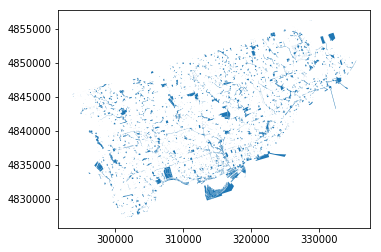

In [518]:
city_parcel.plot()

In [519]:
#creating buffer
#city_parcel = parcels_final[parcels_final.hydro != False]
#hydro_parcel = parcels_final[parcels_final.hydro == True]
hydro_parcel_buff = hydro_parcel.copy()
hydro_parcel_buff['geom'] = hydro_parcel.geom.apply(lambda x: x.buffer(500))

In [520]:
cat_one=city_parcel[city_parcel.cat_one == True]

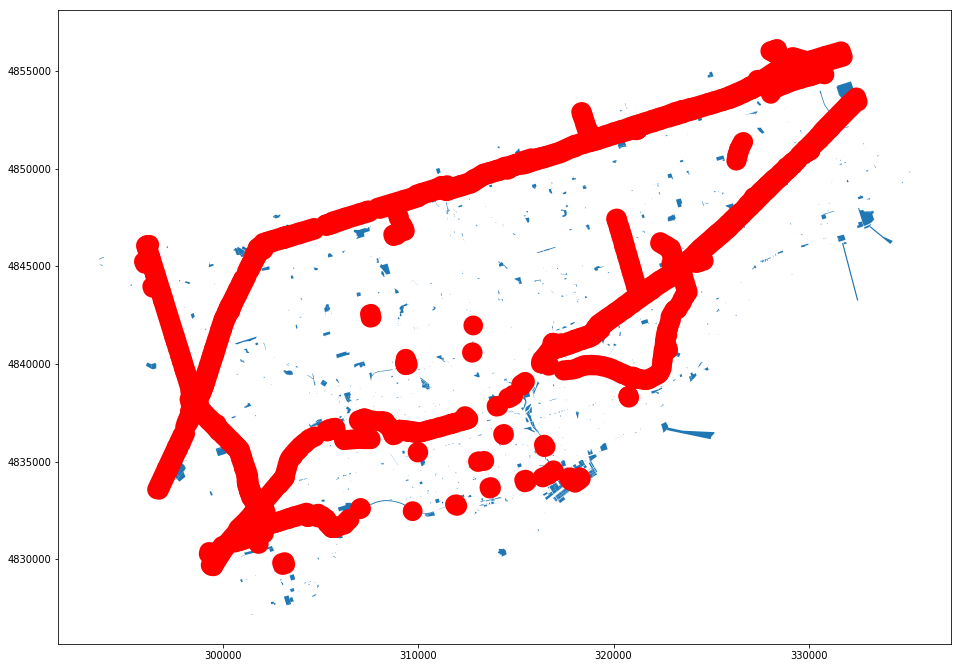

In [521]:
ax = cat_one.plot(figsize=(16,16))
hydro_parcel_buff.plot(ax=ax, color='red')

In [522]:
#create column touches_hydro and set to False
city_parcel['touches_hydro'] = False

for ix, cp in city_parcel.iterrows():
    touching = hydro_parcel_buff.intersects(cp.geom)
    #if any hydro parcels touches individual parcel (cp)
    if touching.any():
        city_parcel.loc[ix,'touches_hydro'] =True



/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


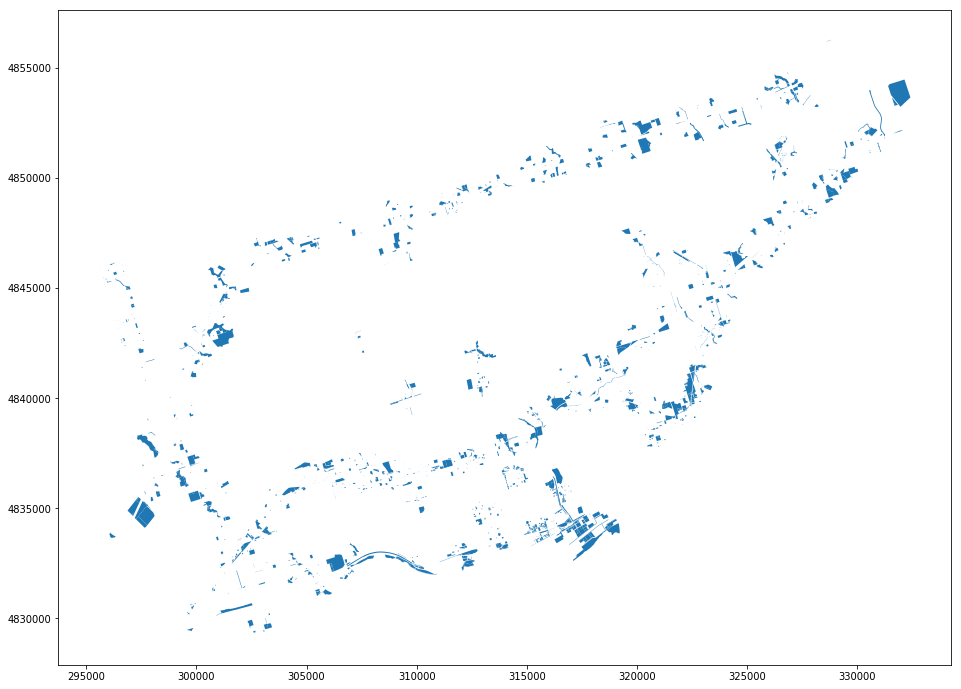

In [523]:
#parcels that touch corridor
city_parcel[city_parcel.touches_hydro == True ].plot(figsize=(16,16))


In [524]:
city_parcel

,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,shape_area_1,AROLL,name_1,use,use_desc,zoning,frontage,depth,site_area,hydro,cat_one,city,touches_hydro
0,133,5117108.0,103020081,COMMON,668.5805664 sq.m,1908013722059000000,Initial load,668.608912,0.0,"(POLYGON ((299052.866 4846780.589, 299089.02 4...",668.608912,1908013722059000000,TORONTO CITY,103,Municipal Park,RM2,60.00,120.00,0.17,False,3,True,False
1,142,5121853.0,102830642,COMMON,1538.6303711 sq.m,1908013260001000000,Initial load,1538.593959,0.0,"(POLYGON ((303207.563 4846527.294, 303207.41 4...",1538.593959,1908013260001000000,TORONTO HYDRO-ELECTRIC SYSTEM LIMITED,560,MEU Transformer Stn,O3,75.00,222.75,0.38,False,2,True,True
2,265,5125483.0,073070407,COMMON,2.5244141 sq.m,1919043367002000000,Initial load,2.523537,0.0,"(POLYGON ((297464.82 4846408.147, 297456.967 4...",2.523537,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
3,354,5124697.0,073150023,COMMON,2.6481934 sq.m,1919043367002000000,Initial load,2.646964,0.0,"(POLYGON ((297518.32 4846434.418, 297518.337 4...",2.646964,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
4,360,5125003.0,073070407,RESERVE,84.7713623 sq.m,1919043367002000000,Initial load,84.726690,0.0,"(POLYGON ((297206.563 4846426.32, 297326.725 4...",84.726690,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
5,601,5125194.0,073070407,RESERVE,1.30896 sq.m,1919043367002000000,Initial load,1.309677,0.0,"(POLYGON ((297509.148 4846421.354, 297507.949 ...",1.309677,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
6,638,5122922.0,073150025,COMMON,12.7009277 sq.m,1919043367002000000,Initial load,12.704280,0.0,"(POLYGON ((297489.242 4846523.609, 297489.532 ...",12.704280,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
7,777,5125527.0,073070407,RESERVE,2.90271 sq.m,1919043367002000000,Initial load,2.901366,0.0,"(POLYGON ((297456.967 4846406.3, 297448.022 48...",2.901366,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
8,824,5125288.0,073070407,COMMON,1.0571289 sq.m,1919043367002000000,Initial load,1.057698,0.0,"(POLYGON ((297497.291 4846417.63, 297493.973 4...",1.057698,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
9,2632,5124902.0,073070407,COMMON,4.9552002 sq.m,1919043367002000000,Initial load,4.961505,0.0,"(POLYGON ((297515.729 4846427.044, 297516.736 ...",4.961505,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False


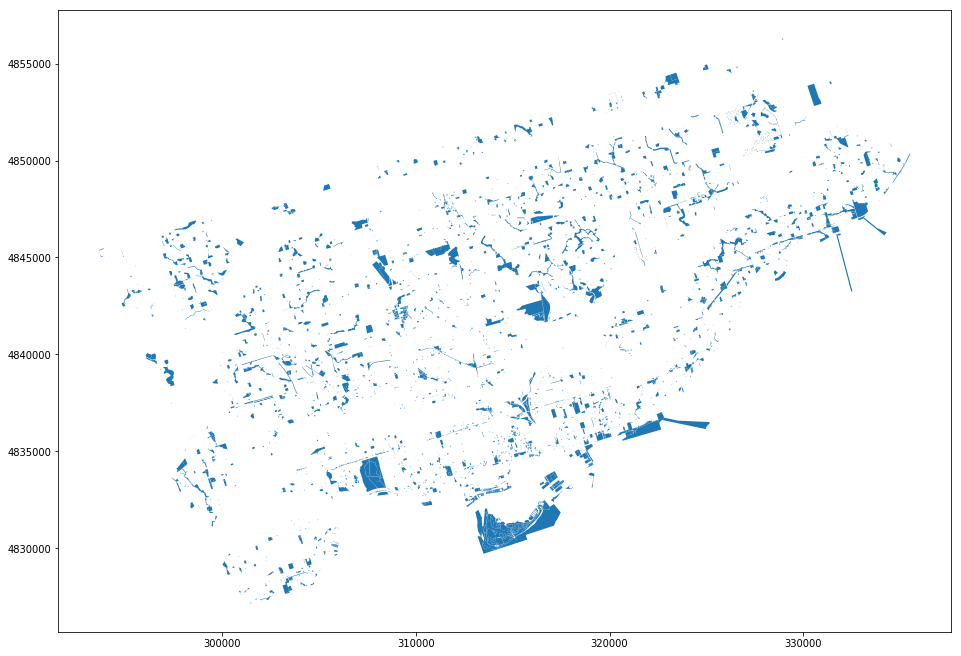

In [525]:
#want to see what parcels are being excluded
city_parcel[city_parcel.touches_hydro == False ].plot(figsize=(16,16))

In [526]:
# copy GeoDataFrame
building_points = buildings.copy()
# change geometry 
building_points['geom'] = building_points['geom'].centroid
building_points.head()


,gid,geom
0,1,POINT (317808.7973704399 4838938.568701858)
1,2,POINT (304407.7030473202 4843051.82979926)
2,3,POINT (306413.1562122367 4834669.344600752)
3,4,POINT (306414.759444866 4834647.332449036)
4,5,POINT (306443.1755438342 4834653.30977759)


In [476]:
building_points.dtypes

gid      int64
geom    object
dtype: object

In [352]:
#pip_mask.dtypes

dtype('bool')

In [ ]:
#pip_data = building_points.loc[pip_mask]

#pip_data

In [527]:
city_parcel_building = city_parcel.copy()


In [528]:
city_parcel_building

,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,shape_area_1,AROLL,name_1,use,use_desc,zoning,frontage,depth,site_area,hydro,cat_one,city,touches_hydro
0,133,5117108.0,103020081,COMMON,668.5805664 sq.m,1908013722059000000,Initial load,668.608912,0.0,"(POLYGON ((299052.866 4846780.589, 299089.02 4...",668.608912,1908013722059000000,TORONTO CITY,103,Municipal Park,RM2,60.00,120.00,0.17,False,3,True,False
1,142,5121853.0,102830642,COMMON,1538.6303711 sq.m,1908013260001000000,Initial load,1538.593959,0.0,"(POLYGON ((303207.563 4846527.294, 303207.41 4...",1538.593959,1908013260001000000,TORONTO HYDRO-ELECTRIC SYSTEM LIMITED,560,MEU Transformer Stn,O3,75.00,222.75,0.38,False,2,True,True
2,265,5125483.0,073070407,COMMON,2.5244141 sq.m,1919043367002000000,Initial load,2.523537,0.0,"(POLYGON ((297464.82 4846408.147, 297456.967 4...",2.523537,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
3,354,5124697.0,073150023,COMMON,2.6481934 sq.m,1919043367002000000,Initial load,2.646964,0.0,"(POLYGON ((297518.32 4846434.418, 297518.337 4...",2.646964,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
4,360,5125003.0,073070407,RESERVE,84.7713623 sq.m,1919043367002000000,Initial load,84.726690,0.0,"(POLYGON ((297206.563 4846426.32, 297326.725 4...",84.726690,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
5,601,5125194.0,073070407,RESERVE,1.30896 sq.m,1919043367002000000,Initial load,1.309677,0.0,"(POLYGON ((297509.148 4846421.354, 297507.949 ...",1.309677,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
6,638,5122922.0,073150025,COMMON,12.7009277 sq.m,1919043367002000000,Initial load,12.704280,0.0,"(POLYGON ((297489.242 4846523.609, 297489.532 ...",12.704280,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
7,777,5125527.0,073070407,RESERVE,2.90271 sq.m,1919043367002000000,Initial load,2.901366,0.0,"(POLYGON ((297456.967 4846406.3, 297448.022 48...",2.901366,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
8,824,5125288.0,073070407,COMMON,1.0571289 sq.m,1919043367002000000,Initial load,1.057698,0.0,"(POLYGON ((297497.291 4846417.63, 297493.973 4...",1.057698,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False
9,2632,5124902.0,073070407,COMMON,4.9552002 sq.m,1919043367002000000,Initial load,4.961505,0.0,"(POLYGON ((297515.729 4846427.044, 297516.736 ...",4.961505,1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False


In [529]:
city_parcel_building.contains(building_points)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
527554    False
527555    False
527556    False
527557    False
527558    False
527559    False
527560    False
527561    False
527562    False
527563    False
527564    False
527565    False
527566    False
527567    False
527568    False
527569    False
527570    False
527571    False
527572    False
527573    False
527574    False
527575    False
527576    False
527577    False
527578    False
527579    False
527580    False
527581    False
527582    False
527583    False
Length: 527584, dtype: b

In [484]:
city_parcel_building[city_parcel_building.contains(building_points)]

/opt/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,AROLL,name_1,use,use_desc,zoning,frontage,depth,site_area,hydro,cat_one,city,touches_hydro,building


In [480]:
#Checks if a polygon contains a point 
#pip_mask = city_parcel.contains(building_points.loc[0, 'geom'])
#pip_mask

city_parcel_building['building'] = city_parcel_building.contains(building_points)


In [481]:
city_parcel_building

,gid,parcelid,name,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,AROLL,name_1,use,use_desc,zoning,frontage,depth,site_area,hydro,cat_one,city,touches_hydro,building
0,133,5117108.0,103020081,COMMON,668.5805664 sq.m,1908013722059000000,Initial load,668.608912,0.0,"(POLYGON ((299052.866 4846780.589, 299089.02 4...",1908013722059000000,TORONTO CITY,103,Municipal Park,RM2,60.00,120.00,0.17,False,3,True,False,False
1,142,5121853.0,102830642,COMMON,1538.6303711 sq.m,1908013260001000000,Initial load,1538.593959,0.0,"(POLYGON ((303207.563 4846527.294, 303207.41 4...",1908013260001000000,TORONTO HYDRO-ELECTRIC SYSTEM LIMITED,560,MEU Transformer Stn,O3,75.00,222.75,0.38,False,2,True,True,False
2,265,5125483.0,073070407,COMMON,2.5244141 sq.m,1919043367002000000,Initial load,2.523537,0.0,"(POLYGON ((297464.82 4846408.147, 297456.967 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False,False
3,354,5124697.0,073150023,COMMON,2.6481934 sq.m,1919043367002000000,Initial load,2.646964,0.0,"(POLYGON ((297518.32 4846434.418, 297518.337 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False,False
4,360,5125003.0,073070407,RESERVE,84.7713623 sq.m,1919043367002000000,Initial load,84.726690,0.0,"(POLYGON ((297206.563 4846426.32, 297326.725 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False,False
5,601,5125194.0,073070407,RESERVE,1.30896 sq.m,1919043367002000000,Initial load,1.309677,0.0,"(POLYGON ((297509.148 4846421.354, 297507.949 ...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False,False
6,638,5122922.0,073150025,COMMON,12.7009277 sq.m,1919043367002000000,Initial load,12.704280,0.0,"(POLYGON ((297489.242 4846523.609, 297489.532 ...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False,False
7,777,5125527.0,073070407,RESERVE,2.90271 sq.m,1919043367002000000,Initial load,2.901366,0.0,"(POLYGON ((297456.967 4846406.3, 297448.022 48...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False,False
8,824,5125288.0,073070407,COMMON,1.0571289 sq.m,1919043367002000000,Initial load,1.057698,0.0,"(POLYGON ((297497.291 4846417.63, 297493.973 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False,False
9,2632,5124902.0,073070407,COMMON,4.9552002 sq.m,1919043367002000000,Initial load,4.961505,0.0,"(POLYGON ((297515.729 4846427.044, 297516.736 ...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,True,False,False


In [482]:
city_parcel_building.building.value_counts()

False    8419
Name: building, dtype: int64

In [417]:
address

,ogc_fid,wkb_geometry,geo_id,lfn_id,link,maint_stag,address,lfname,lonum,lonumsuf,hinum,hinumsuf,arc_side,distance,fcode,fcode_des,class,name,x,y,longitude,latitude,objectid,mun_name,ward_name
0,1,POINT (301211.152 4827985.051),1015200.0,2007.0,914764.0,REGULAR,22,Lloyd George Ave,22.0,None,0.0,None,L,78.08,100001.0,Low Density Residential,Land,None,301211.152,4827985.051,-79.544251,43.593789,4104309.0,Etobicoke,Etobicoke-Lakeshore (6)
1,2,POINT (301272.174 4827946.759),1015189.0,2007.0,914764.0,REGULAR,3,Lloyd George Ave,3.0,None,0.0,None,R,22.96,100001.0,Low Density Residential,Land,None,301272.174,4827946.759,-79.543495,43.593445,4104306.0,Etobicoke,Etobicoke-Lakeshore (6)
2,3,POINT (301265.553 4827966.49),20140046.0,2007.0,914764.0,REGULAR,7A,Lloyd George Ave,7.0,A,0.0,None,R,43.77,100001.0,Low Density Residential,Land,None,301265.553,4827966.490,-79.543577,43.593622,4104315.0,Etobicoke,Etobicoke-Lakeshore (6)
3,4,POINT (301024.624 4828252.32),1001594.0,1620.0,914677.0,REGULAR,58,Foch Ave,58.0,None,0.0,None,L,52.84,100001.0,Low Density Residential,Land,None,301024.624,4828252.320,-79.546567,43.596203,2842769.0,Etobicoke,Etobicoke-Lakeshore (6)
4,5,POINT (301037.208 4828229.086),1001593.0,1620.0,914677.0,REGULAR,54,Foch Ave,54.0,None,0.0,None,L,26.90,100001.0,Low Density Residential,Land,None,301037.208,4828229.086,-79.546411,43.595994,2005187.0,Etobicoke,Etobicoke-Lakeshore (6)
5,6,POINT (301023.299 4828264.664),1001595.0,1620.0,914677.0,REGULAR,60,Foch Ave,60.0,None,0.0,None,L,65.01,100001.0,Low Density Residential,Land,None,301023.299,4828264.664,-79.546583,43.596314,1977825.0,Etobicoke,Etobicoke-Lakeshore (6)
6,7,POINT (301017.022 4828274.464),1001597.0,1620.0,914677.0,REGULAR,62,Foch Ave,62.0,None,0.0,None,L,76.24,100001.0,Low Density Residential,Land,None,301017.022,4828274.464,-79.546661,43.596402,1570005.0,Etobicoke,Etobicoke-Lakeshore (6)
7,8,POINT (301010.239 4828286.59),1001599.0,1620.0,914677.0,REGULAR,64,Foch Ave,64.0,None,0.0,None,L,89.84,100001.0,Low Density Residential,Land,None,301010.239,4828286.590,-79.546745,43.596511,1585038.0,Etobicoke,Etobicoke-Lakeshore (6)
8,9,POINT (301072.405 4828239.453),7275227.0,1877.0,7275212.0,REGULAR,46,Jellicoe Ave,46.0,None,0.0,None,R,85.30,100001.0,Low Density Residential,Land,None,301072.405,4828239.453,-79.545975,43.596087,1558852.0,Etobicoke,Etobicoke-Lakeshore (6)
9,10,POINT (301083.102 4828246.611),7275226.0,1877.0,7275212.0,REGULAR,44,Jellicoe Ave,44.0,None,0.0,None,R,72.98,100001.0,Low Density Residential,Land,None,301083.102,4828246.611,-79.545842,43.596152,1573857.0,Etobicoke,Etobicoke-Lakeshore (6)


In [420]:
address.dtypes

ogc_fid           int64
wkb_geometry     object
geo_id          float64
lfn_id          float64
link            float64
maint_stag       object
address          object
lfname           object
lonumsuf         object
hinum           float64
hinumsuf         object
arc_side         object
distance        float64
fcode           float64
fcode_des        object
class            object
name             object
x               float64
y               float64
longitude       float64
latitude        float64
objectid        float64
mun_name         object
ward_name        object
dtype: object

In [422]:
#There are 8,419 parcels in city_parcel, when I do the spatial join using op = contains I get 13,371 records
#as every address point contained within the parcel polygons are included in the join.

#If I use op = within I get 8,419 records so Only one address is being alocated to the parcel.

parcel_address = gpd.sjoin(city_parcel, address, op='within', how='left')

In [383]:
parcel_address

,gid,parcelid,name_left,feature_ty,statedarea,aroll,aroll_sour,shape_area,shape_len,geom,AROLL,name_1,use,use_desc,zoning,frontage,depth,site_area,hydro,cat_one,cat_two,cat_three,city,touches_hydro,building,address_left,index_right,ogc_fid,geo_id,lfn_id,link,maint_stag,address_right,lfname,lonum,lonumsuf,hinum,hinumsuf,arc_side,distance,fcode,fcode_des,class,name_right,x,y,longitude,latitude,objectid,mun_name,ward_name
0,133,5117108.0,103020081,COMMON,668.5805664 sq.m,1908013722059000000,Initial load,668.608912,0.0,"(POLYGON ((299052.866 4846780.589, 299089.02 4...",1908013722059000000,TORONTO CITY,103,Municipal Park,RM2,60.00,120.00,0.17,False,3,0,0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,142,5121853.0,102830642,COMMON,1538.6303711 sq.m,1908013260001000000,Initial load,1538.593959,0.0,"(POLYGON ((303207.563 4846527.294, 303207.41 4...",1908013260001000000,TORONTO HYDRO-ELECTRIC SYSTEM LIMITED,560,MEU Transformer Stn,O3,75.00,222.75,0.38,False,2,0,0,True,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,265,5125483.0,073070407,COMMON,2.5244141 sq.m,1919043367002000000,Initial load,2.523537,0.0,"(POLYGON ((297464.82 4846408.147, 297456.967 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,0,0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,354,5124697.0,073150023,COMMON,2.6481934 sq.m,1919043367002000000,Initial load,2.646964,0.0,"(POLYGON ((297518.32 4846434.418, 297518.337 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,0,0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,360,5125003.0,073070407,RESERVE,84.7713623 sq.m,1919043367002000000,Initial load,84.726690,0.0,"(POLYGON ((297206.563 4846426.32, 297326.725 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,0,0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,601,5125194.0,073070407,RESERVE,1.30896 sq.m,1919043367002000000,Initial load,1.309677,0.0,"(POLYGON ((297509.148 4846421.354, 297507.949 ...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,0,0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,638,5122922.0,073150025,COMMON,12.7009277 sq.m,1919043367002000000,Initial load,12.704280,0.0,"(POLYGON ((297489.242 4846523.609, 297489.532 ...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,0,0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,777,5125527.0,073070407,RESERVE,2.90271 sq.m,1919043367002000000,Initial load,2.901366,0.0,"(POLYGON ((297456.967 4846406.3, 297448.022 48...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,0,0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,824,5125288.0,073070407,COMMON,1.0571289 sq.m,1919043367002000000,Initial load,1.057698,0.0,"(POLYGON ((297497.291 4846417.63, 297493.973 4...",1919043367002000000,TORONTO CITY,130,"Non-buildable land (walkway,buffer,etc)",ICI,1335.23,1.00,0.03,False,2,0,0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2632,5124902.0,073070407,COMMON,4.9552002 sq.m,1919043367002000000,Initial load,4.961505,0.0,"(POLYGON ((297515.729 4846427.044, 297516.736 ...",19190

In [ ]:
#https://geoffboeing.com/2016/10/r-tree-spatial-index-python/
#spatial_index = gdf.sindex
#possible_matches_index = list(spatial_index.intersection(polygon.bounds))
#possible_matches = gdf.iloc[possible_matches_index]
#precise_matches = possible_matches[possible_matches.intersects(polygon)]


#from Joyce's teranet
#possible_matches_index = list(test.sindex.intersection(parcel[1].geometry.bounds))
        
 #   possible_matches = test.iloc[possible_matches_index]

  #  precise_matches = possible_matches[possible_matches.intersects(parcel[1].geometry.centroid)]

    
#https://gis.stackexchange.com/questions/90055/finding-if-two-polygons-intersect-in-python/90063
    
#    from osgeo import ogr

#wkt1 = "POLYGON ((1208064.271243039 624154.6783778917, 1208064.271243039 601260.9785661874, 1231345.9998651114 601260.9785661874, 1231345.9998651114 624154.6783778917, 1208064.271243039 624154.6783778917))"
#wkt2 = "POLYGON ((1199915.6662253144 633079.3410163528, 1199915.6662253144 614453.958118695, 1219317.1067437078 614453.958118695, 1219317.1067437078 633079.3410163528, 1199915.6662253144 633079.3410163528)))"

#poly1 = ogr.CreateGeometryFromWkt(wkt1)
#poly2 = ogr.CreateGeometryFromWkt(wkt2)

#intersection = poly1.Intersection(poly2)

#print intersection.ExportToWkt()

#selecting only city parcels that touches_hydro flag is true
#intersection = city_parcel_copy.copy()
#intersection['geom'] = city_parcel_copy.geom.apply(lambda x: x.buffer(500))

#intersection = city_parcel_copy.Intersection(buildings)

# thought I would try overlay in case this was happening
#https://gis.stackexchange.com/questions/230494/intersecting-two-shape-problem-using-geopandas

#intersection = gpd.overlay(city_parcel_copy, buildings, how='intersection')

In [381]:
joined.dtypes

gid                int64
parcelid         float64
name_left         object
feature_ty        object
statedarea        object
aroll              int64
aroll_sour        object
shape_area       float64
shape_len        float64
geom              object
AROLL              int64
name_1            object
use                int64
use_desc          object
zoning            object
frontage         float64
depth            float64
site_area        float64
hydro               bool
cat_one            int64
cat_two            int64
cat_three          int64
city                bool
touches_hydro       bool
building            bool
address_left        bool
index_right      float64
ogc_fid          float64
geo_id           float64
lfn_id           float64
link             float64
maint_stag        object
address_right     object
lfname            object
lonum            float64
lonumsuf          object
hinum            float64
hinumsuf          object
arc_side          object
distance         float64


In [314]:
#writing to layer

password = open('./password.txt','r').readline()

#using string wildcards to input the username/password variables %s means input text here 
#engine = create_engine('postgresql://%s:%s@172.19.118.205:5432/gisdata' %(kmerrem,password))
username = 'kmerrem'
#print('postgresql://%s:%s@172.19.118.205:5432/gisdata' %(username,password))
engine = create_engine('postgresql://%s:%s@172.19.118.205:5432/gisdata' %(username,password))

#selecting only city parcels that touches_hydro flag is true
city_parcel_copy = city_parcel[city_parcel.touches_hydro == True ]

city_parcel_copy['geometry'] = city_parcel_copy['geom']

city_parcel_copy['geom'] = city_parcel_copy['geometry'].apply(lambda x: WKTElement(x.wkt, srid=2019))

#drop the geometry column as it is now duplicative
city_parcel_copy.drop('geometry', 1, inplace=True)

# drop the uppercase AROLL column so ArcPro can open the layer
city_parcel_copy.drop('AROLL', 1, inplace=True)

#drop additional parcel columns
city_parcel_copy.drop('aroll_sour', 1, inplace=True)

#drop address columns from join
city_parcel_copy.drop('lonum', 1, inplace=True)
city_parcel_copy.drop('lonumsuf', 1, inplace=True)
city_parcel_copy.drop('hinum', 1, inplace=True)
city_parcel_copy.drop('hinumsuf', 1, inplace=True)
city_parcel_copy.drop('arc_side', 1, inplace=True)
city_parcel_copy.drop('distance', 1, inplace=True)
city_parcel_copy.drop('fcode', 1, inplace=True)
city_parcel_copy.drop('fcode_des', 1, inplace=True)
city_parcel_copy.drop('class', 1, inplace=True)
city_parcel_copy.drop('name_right', 1, inplace=True)
city_parcel_copy.drop('x', 1, inplace=True)
city_parcel_copy.drop('y', 1, inplace=True)
city_parcel_copy.drop('longitude', 1, inplace=True)
city_parcel_copy.drop('latitude ', 1, inplace=True)
city_parcel_copy.drop('mun_name', 1, inplace=True)
city_parcel_copy.drop('ward_name', 1, inplace=True)


#introduced object id but arcgis pro didn't see it as a number so I couldn't use it for unique value when
#I used query to add layer
city_parcel_copy['objectid'] = city_parcel_copy.index

city_parcel_copy.columns = [col.lower().replace(" ","_") for col in city_parcel_copy.columns]
# Use 'dtype' to specify column's type
# For the geom column, we will use GeoAlchemy's type 'Geometry'
city_parcel_copy.to_sql('city_parcel_hydro', gisdata_engine, if_exists='replace', index=True, 
                         dtype={'geom': Geometry('MULTIPOLYGON', srid=2019)})


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/anaconda3/lib/

In [315]:
city_parcel_copy.dtypes

gid                int64
parcelid         float64
name              object
feature_ty        object
statedarea        object
aroll              int64
aroll_sour        object
shape_area       float64
shape_len        float64
geom              object
name_1            object
use                int64
use_desc          object
zoning            object
frontage         float64
depth            float64
site_area        float64
hydro               bool
cat_one            int64
cat_two            int64
cat_three          int64
city                bool
touches_hydro       bool
objectid           int64
dtype: object

In [309]:
#Isolating hydro parcles to visualize
#hydro_parcel = parcels_final[parcels_final.hydro == True]

#writing to layer

password = open('./password.txt','r').readline()
             
#using string wildcards to input the username/password variables %s means input text here 
#engine = create_engine('postgresql://%s:%s@172.19.118.205:5432/gisdata' %(kmerrem,password))
username = 'kmerrem'
#print('postgresql://%s:%s@172.19.118.205:5432/gisdata' %(username,password))
engine = create_engine('postgresql://%s:%s@172.19.118.205:5432/gisdata' %(username,password))

#selecting only city parcels that touches_hydro flag is true
hydro_parcel_copy = parcels_final[parcels_final.hydro == True]
#city_parcel_copy = city_parcel[city_parcel.touches_hydro == True ]

hydro_parcel_copy['geometry'] = hydro_parcel_copy['geom']

hydro_parcel_copy['geom'] = hydro_parcel_copy['geometry'].apply(lambda x: WKTElement(x.wkt, srid=2019))

#drop the geometry column as it is now duplicative
hydro_parcel_copy.drop('geometry', 1, inplace=True)

#introduced object id but arcgis pro didn't see it as a number so I couldn't use it for unique value when
#I used query to add layer
hydro_parcel_copy['objectid'] = hydro_parcel_copy.index

hydro_parcel_copy.columns = [col.lower().replace(" ","_") for col in hydro_parcel_copy.columns]

# drop the uppercase AROLL column so ArcPro can open the layer
#hydro_parcel_copy.drop('AROLL', 1, inplace=True)

# Use 'dtype' to specify column's type
# For the geom column, we will use GeoAlchemy's type 'Geometry'
hydro_parcel_copy.to_sql('hydro_parcel', gisdata_engine, if_exists='replace', index=True, 
                         dtype={'geom': Geometry('MULTIPOLYGON', srid=2019)})


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/anaconda3/lib/

In [372]:
hydro_parcel_copy.dtypes

gid             int64
parcelid      float64
name           object
feature_ty     object
statedarea     object
aroll           int64
aroll_sour     object
shape_area    float64
shape_len     float64
geom           object
aroll           int64
name_1         object
use             int64
use_desc       object
zoning         object
frontage      float64
depth         float64
site_area     float64
hydro            bool
cat_one         int64
cat_two         int64
cat_three       int64
city             bool
objectid        int64
dtype: object